In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

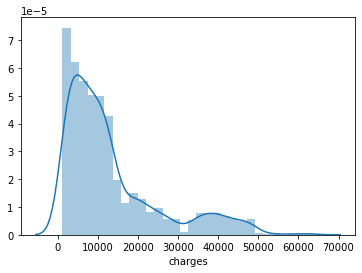

In [6]:
sns.distplot(df['charges'])

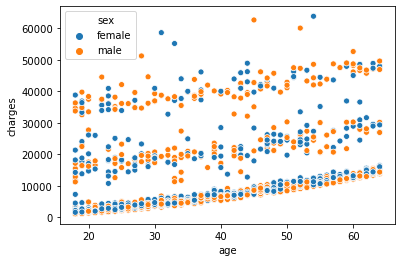

In [7]:
sns.scatterplot(df['age'], df['charges'], hue=df['sex'])

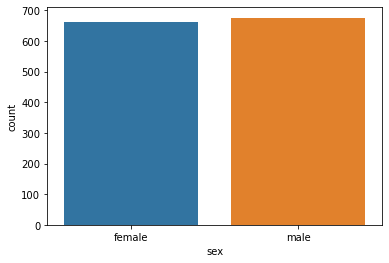

In [8]:
sns.countplot(df['sex'])

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


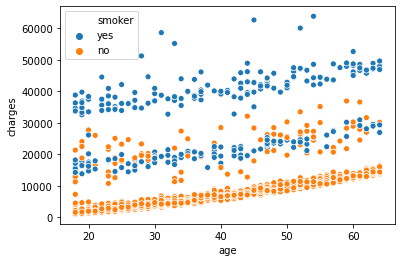

In [10]:
sns.scatterplot(df['age'], df['charges'], hue=df['smoker'])

In [11]:
#first model before label encoding

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['age', 'bmi', 'children']], df['charges'],\
                                                    test_size=0.2, random_state=42)

In [15]:
model1 = LinearRegression().fit(X_train1, y_train1)

In [16]:
y_pred1 = model1.predict(X_test1)

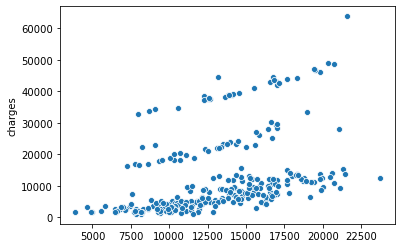

In [17]:
sns.scatterplot(y_pred1, y_test1)

In [18]:
model1.score(X_train1, y_train1)

0.10987471044767116

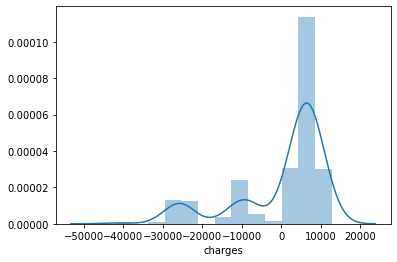

In [19]:
sns.distplot(y_pred1-y_test1)

In [20]:
abs(y_pred1-y_test1).mean()

9181.311632897385

In [21]:
model1_df = pd.DataFrame({'pred':y_pred1, 'actual': y_test1})

In [22]:
model1_df.head()

,pred,actual
764,13305.289459,9095.06825
887,11801.951701,5272.17580
890,16941.714371,29330.98315
1293,14278.422069,9301.89355
259,8680.254394,33750.29180


In [23]:
model1_df.describe()

,pred,actual
count,268.000000,268.000000
mean,13316.312996,12968.317063
std,3927.299564,12483.196202
min,3883.250642,1131.506600
25%,10288.972056,4288.744850
50%,13416.045868,8487.880300
75%,16342.351055,16367.829375
max,23706.920531,63770.428010


In [24]:
#Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
smoker_enc = le.fit_transform(df['smoker'])

In [27]:
smoker_enc

array([1, 0, 0, ..., 0, 0, 1])

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df['sex_enc'] = le.fit_transform(df['sex'])
df['smoker_enc'] = le.fit_transform(df['smoker'])
df['region_enc'] = le.fit_transform(df['region'])

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_enc,smoker_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


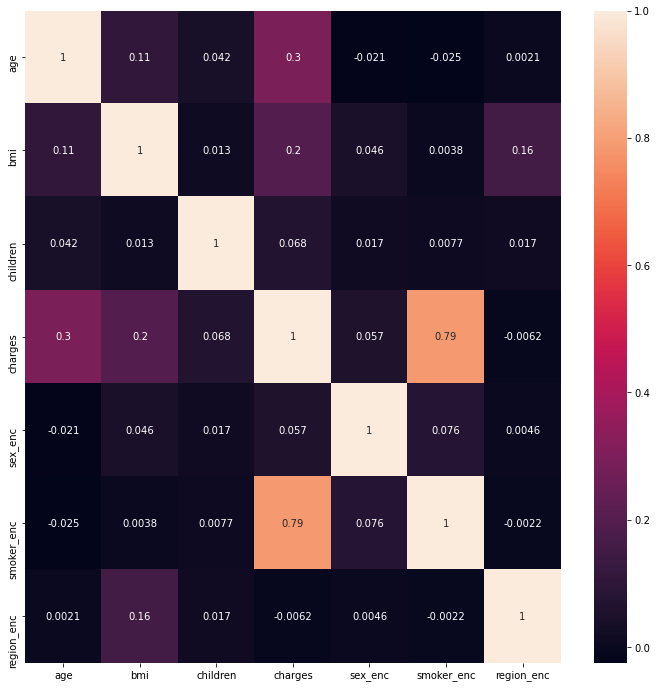

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

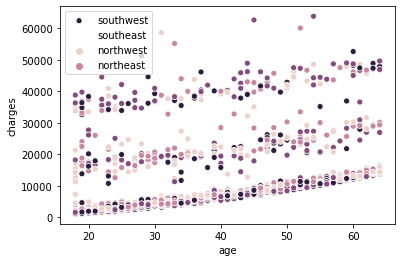

In [32]:
sns.scatterplot(df['age'], df['charges'], hue=df['region_enc'])
plt.legend(df['region'].unique())

In [33]:
df[['region', 'region_enc']].head()

,region,region_enc
0,southwest,3
1,southeast,2
2,southeast,2
3,northwest,1
4,northwest,1


In [34]:
set(le.inverse_transform(df['region_enc']))

{'northeast', 'northwest', 'southeast', 'southwest'}

In [35]:
set(df['region_enc'])

{0, 1, 2, 3}

In [36]:
#model after label encoding

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_enc,smoker_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['age', 'bmi', 'children', 'sex_enc',\
                                                        'smoker_enc', 'region_enc']], df['charges'],\
                                                    test_size=0.2, random_state=42)

In [39]:
model2 = LinearRegression().fit(X_train2, y_train2)

In [40]:
y_pred2 = model2.predict(X_test2)

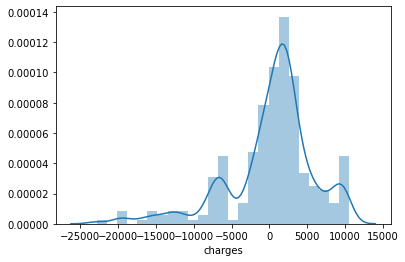

In [41]:
sns.distplot(y_pred2-y_test2)

In [99]:
model2.score(X_train2, y_train2)

0.7417049283233981

In [100]:
model2.score(X_test2, y_test2)

0.7833463107364538

In [43]:
abs(y_pred2-y_test2).mean()

4186.508898366435

In [44]:
y_test2.mean()

12968.31706286941

In [45]:
model2_df = pd.DataFrame({'pred':y_pred2, 'actual': y_test2})

In [46]:
model2_df.head()

,pred,actual
764,8924.407244,9095.06825
887,7116.295018,5272.17580
890,36909.013521,29330.98315
1293,9507.874691,9301.89355
259,27013.350008,33750.29180


In [47]:
model2_df.describe()

,pred,actual
count,268.000000,268.000000
mean,13193.095706,12968.317063
std,10764.068923,12483.196202
min,-1483.152818,1131.506600
25%,5455.267306,4288.744850
50%,10193.877080,8487.880300
75%,15049.113521,16367.829375
max,40959.081722,63770.428010


In [48]:
#NOTE: model2 is predicting negative values

In [49]:
#if negative values are converted to 0 

In [50]:
y_pred2_1 = np.array([val if val>=0 else 0 for val in y_pred2])

In [51]:
y_pred1.min()

3883.2506424174044

In [52]:
y_pred2.min()

-1483.1528181468293

In [53]:
y_pred2_1.min()

0.0

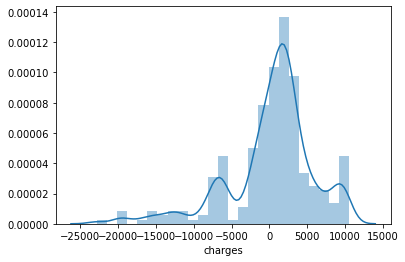

In [54]:
sns.distplot(y_pred2_1-y_test2)

In [55]:
abs(y_pred2_1-y_test2).mean()

4175.132894895787

Text(0.5, 1.0, 'Predicted charges (one hot encoded) (model2 adjusted for neg)')

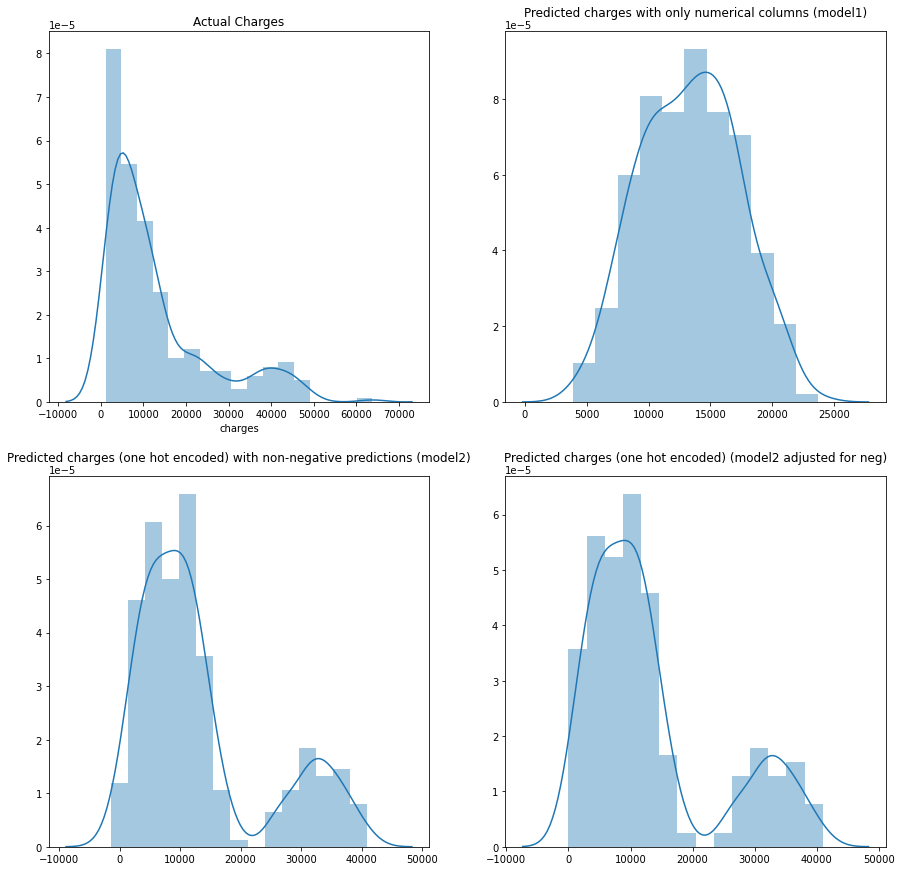

In [56]:
#predicted distribution plot
fig1, axs1 = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(y_test1, ax=axs1[0][0]).set_title('Actual Charges')
sns.distplot(y_pred1, ax=axs1[0][1]).set_title('Predicted charges with only numerical columns (model1)', pad=15)
sns.distplot(y_pred2, ax=axs1[1][0]).set_title('Predicted charges (one hot encoded) with non-negative predictions (model2)', pad=15)
sns.distplot(y_pred2_1, ax=axs1[1][1]).set_title('Predicted charges (one hot encoded) (model2 adjusted for neg)', pad=15)

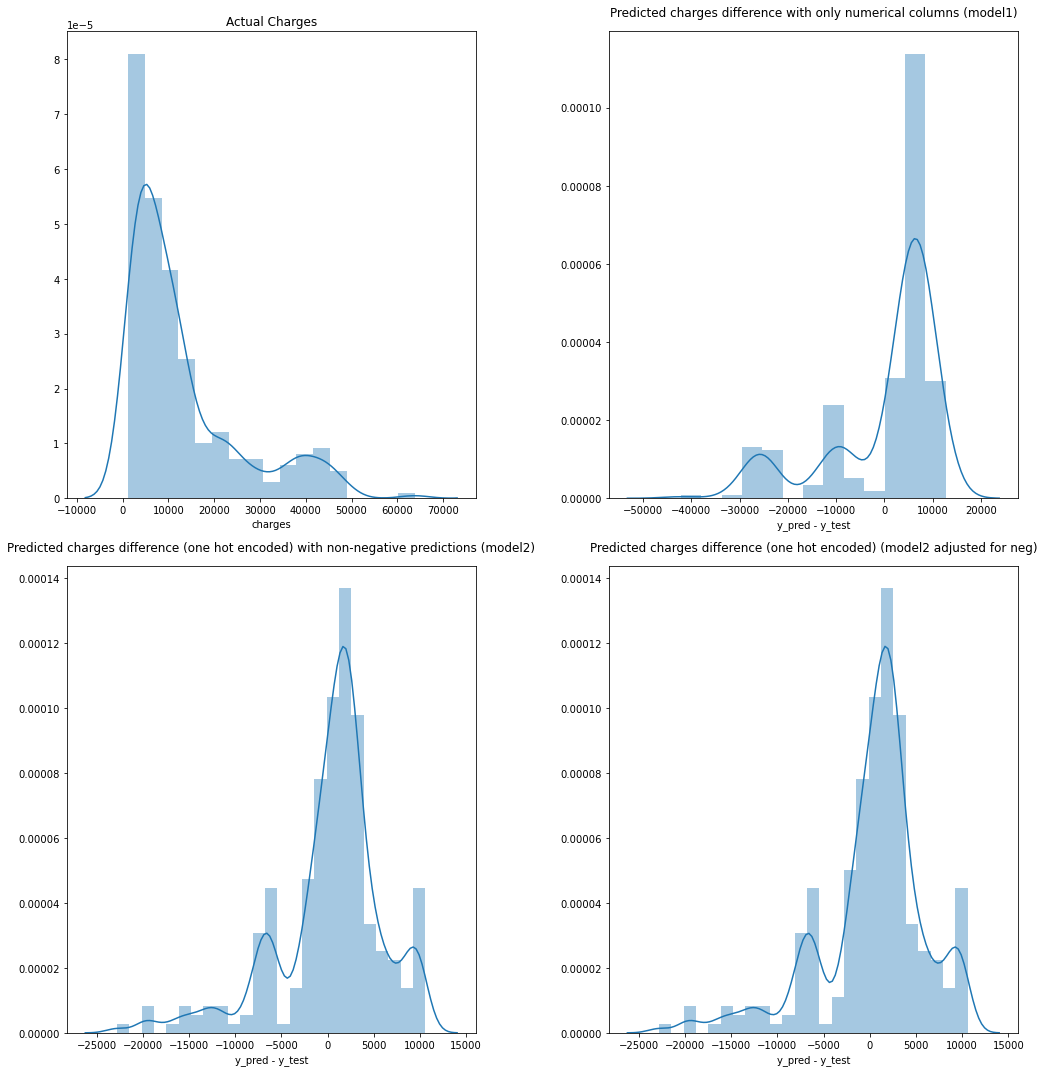

In [57]:
# predicted - actual charge distribution
fig1, axs1 = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(y_test1, ax=axs1[0][0]).set_title('Actual Charges')
sns.distplot(y_pred1-y_test1, ax=axs1[0][1]).set_title('Predicted charges difference with only numerical columns (model1)', pad=15)
sns.distplot(y_pred2-y_test1, ax=axs1[1][0]).set_title('Predicted charges difference (one hot encoded) with non-negative predictions (model2)', pad=15)
sns.distplot(y_pred2_1-y_test1, ax=axs1[1][1]).set_title('Predicted charges difference (one hot encoded) (model2 adjusted for neg)', pad=15)
axs1[0][1].set_xlabel('y_pred - y_test')
axs1[1][0].set_xlabel('y_pred - y_test')
axs1[1][1].set_xlabel('y_pred - y_test')
plt.tight_layout()

In [58]:
# standardization, normalization, etc
# check test nb 2
# conclusion: no improvement 

Text(0.5, 1.0, 'Linear Regression with Label Encoding (R^2-score = 0.7833463107364538)')

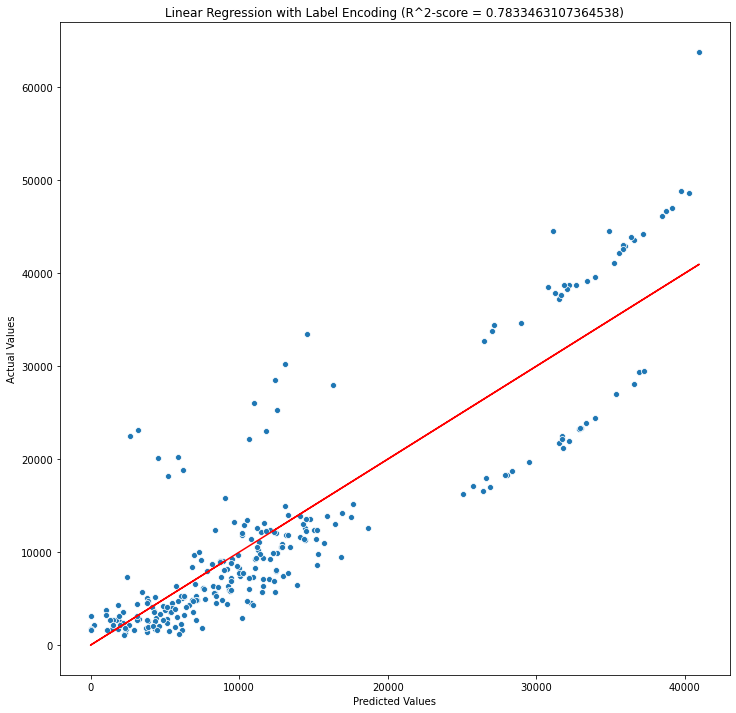

In [98]:
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred2_1, y_test2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(y_pred2_1, y_pred2_1, color='red')
plt.title('Linear Regression with Label Encoding (R^2-score = {})'.format(model2.score(X_test2, y_test2)))

In [60]:
abs(y_pred2_1-y_test1).mean()

4175.132894895787

In [61]:
df['charges'].mean()

13270.422265141257

In [62]:
y_test1.mean()

12968.31706286941

In [63]:
y_pred2_1.mean()

13204.471709340089

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
mean_absolute_error(y_test2, y_pred2_1)

4175.132894895788

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_enc,smoker_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
poly = PolynomialFeatures(degree=2)
df_poly = poly.fit_transform(df[['age', 'bmi', 'children']])

In [69]:
# poly.get_feature_names()
poly_feat_names = ['1', 'age', 'bmi', 'children', 'age^2', 'age*bmi', 'age*children', 'bmi^2', 'bmi*children', 'children^2']

In [70]:
df_poly = pd.DataFrame(df_poly, columns=poly_feat_names)

In [71]:
df_poly.head()

,1,age,bmi,children,age^2,age*bmi,age*children,bmi^2,bmi*children,children^2
0,1.0,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0
1,1.0,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0
2,1.0,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0
3,1.0,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0
4,1.0,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0


In [72]:
df_poly_main = df_poly.drop('1', axis=1).copy()
df_poly_main['sex_enc'] = df['sex_enc'].copy()
df_poly_main['smoker_enc'] = df['smoker_enc'].copy()
df_poly_main['region_enc'] = df['region_enc'].copy()
df_poly_main['charges'] = df['charges'].copy()

In [73]:
df_poly_main.head()

,age,bmi,children,age^2,age*bmi,age*children,bmi^2,bmi*children,children^2,sex_enc,smoker_enc,region_enc,charges
0,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0,0,1,3,16884.92400
1,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0,1,0,2,1725.55230
2,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0,1,0,2,4449.46200
3,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0,1,0,1,21984.47061
4,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0,1,0,1,3866.85520


In [74]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_poly_main.drop('charges', axis=1),\
                                                        df_poly_main['charges'], test_size=0.2, random_state=42)

In [75]:
model3 = LinearRegression().fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [95]:
model3.score(X_train3, y_train3)

0.7479226134265569

In [96]:
model3.score(X_test3, y_test3)

0.7808007179849634

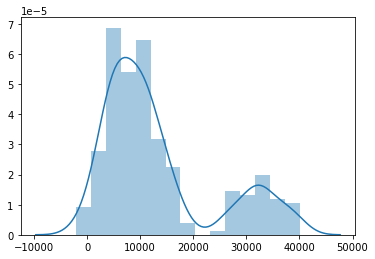

In [77]:
sns.distplot(y_pred3)

In [78]:
y_pred3_1 = np.array([val if val>=0 else 0 for val in y_pred3])

In [79]:
mean_absolute_error(y_test3, y_pred3_1)

4228.495625506941

Text(0.5, 1.0, 'Linear Regression with Label Encoding and Polynomial Features) (R^2-score = 0.7808007179849634)')

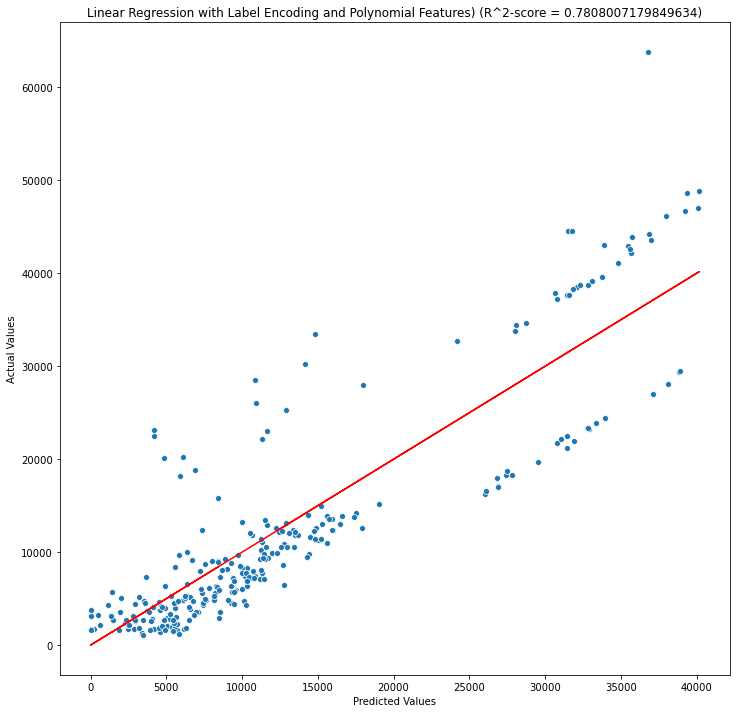

In [94]:
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred3_1, y_test3)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot(y_pred3_1, y_pred3_1, color='red')
plt.title('Linear Regression with Label Encoding and Polynomial Features) (R^2-score = {})'.format(model3.score(X_test3, y_test3)))

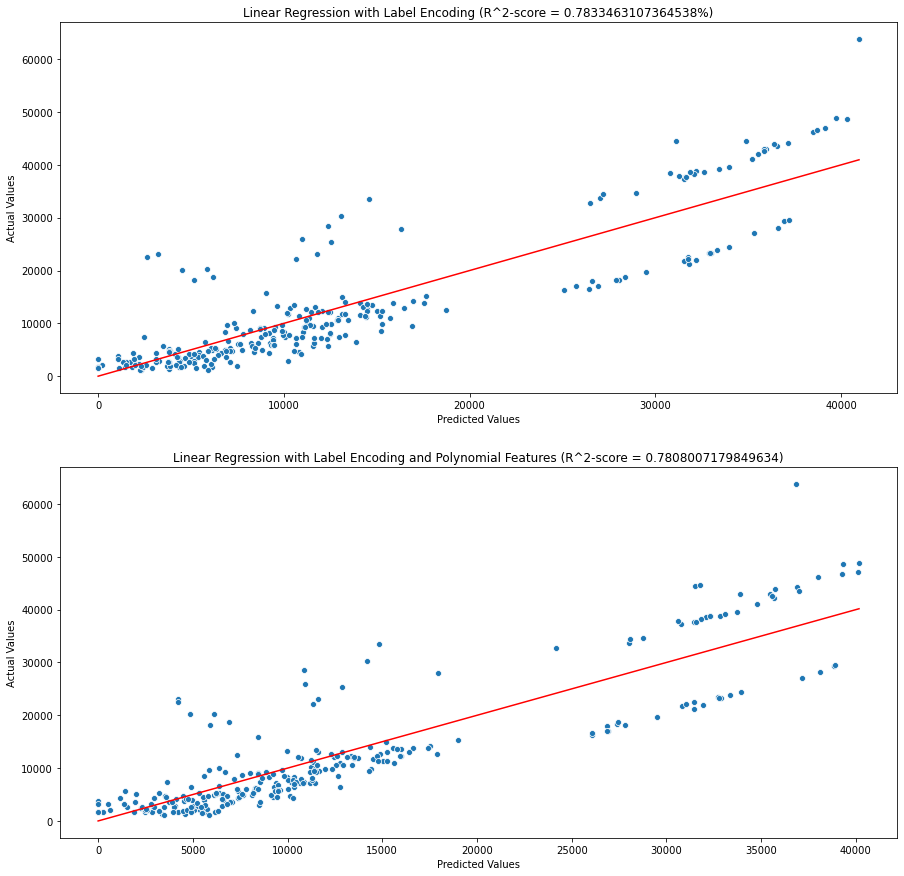

<Figure size 864x864 with 0 Axes>

In [92]:
fig2, axs2 = plt.subplots(2, 1, figsize=(15,15))
#1st plot
sns.scatterplot(y_pred2_1, y_test1, ax=axs2[0])
axs2[0].set_xlabel('Predicted Values')
axs2[0].set_ylabel('Actual Values')
# plt.plot(y_pred2_1, y_pred2_1, color='red')
sns.lineplot(y_pred2_1, y_pred2_1, color='red', ax=axs2[0])
axs2[0].set_title('Linear Regression with Label Encoding (R^2-score = {}%)'.format(model2.score(X_test2, y_test2)))
#2nd plot 
plt.figure(figsize=(12,12))
sns.scatterplot(y_pred3_1, y_test3, ax=axs2[1])
axs2[1].set_xlabel('Predicted Values')
axs2[1].set_ylabel('Actual Values')
# plt.plot(y_pred3_1, y_pred3_1, color='red')
sns.lineplot(y_pred3_1, y_pred3_1, color='red', ax=axs2[1])
axs2[1].set_title('Linear Regression with Label Encoding and Polynomial Features (R^2-score = {})'.format(model3.score(X_test3, y_test3)))
plt.tight_layout()

In [82]:
#not much difference 
# huh, something doesn't feel right

In [83]:
# changing the test size from 20% to 30% split

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_enc,smoker_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [85]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df[['age', 'bmi', 'children', 'sex_enc',\
                                                        'smoker_enc', 'region_enc']], df['charges'],\
                                                    test_size=0.3, random_state=42)

In [86]:
model4 = LinearRegression().fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
model4.score(X_test4, y_test4)

0.7694415927057693

In [87]:
df_poly_main.head()

,age,bmi,children,age^2,age*bmi,age*children,bmi^2,bmi*children,children^2,sex_enc,smoker_enc,region_enc,charges
0,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0,0,1,3,16884.92400
1,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0,1,0,2,1725.55230
2,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0,1,0,2,4449.46200
3,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0,1,0,1,21984.47061
4,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0,1,0,1,3866.85520


In [90]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df_poly_main.drop('charges', axis=1), df['charges'],\
                                                        test_size=0.3, random_state=42)

In [91]:
model5 = LinearRegression().fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)
model5.score(X_test5, y_test5)

0.7687282108432513